In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import wfdb
import seaborn as sns
import ast

In [3]:
import pandas as pd
import numpy as np
import wfdb
import ast

def load_raw_data(df, sampling_rate, path):
    if sampling_rate == 100:
        data = [wfdb.rdsamp(path+f) for f in df.filename_lr]
    else:
        data = [wfdb.rdsamp(path+f) for f in df.filename_hr]
    data = np.array([signal for signal, meta in data])
    return data

path = '/home/naman21266/ptbxl_dataset/'
sampling_rate=100

# load and convert annotation data
Y = pd.read_csv(path+'ptbxl_database.csv', index_col='ecg_id')
Y.scp_codes = Y.scp_codes.apply(lambda x: ast.literal_eval(x))

# Load raw signal data
X = load_raw_data(Y, sampling_rate, path)

# Load scp_statements.csv for diagnostic aggregation
agg_df = pd.read_csv(path+'scp_statements.csv', index_col=0)
agg_df = agg_df[agg_df.diagnostic == 1]

def aggregate_diagnostic(y_dic):
    tmp = []
    for key in y_dic.keys():
        if key in agg_df.index:
            tmp.append(agg_df.loc[key].diagnostic_class)
    return list(set(tmp))

# Apply diagnostic superclass
Y['diagnostic_superclass'] = Y.scp_codes.apply(aggregate_diagnostic)

# Split data into train and test
test_fold = 10
# Train
X_train = X[np.where(Y.strat_fold != test_fold)]
y_train = Y[(Y.strat_fold != test_fold)].diagnostic_superclass
# Test
X_test = X[np.where(Y.strat_fold == test_fold)]
y_test = Y[Y.strat_fold == test_fold].diagnostic_superclass

In [4]:
X_train.shape

(19634, 1000, 12)

In [5]:
X_test.shape

(2203, 1000, 12)

In [6]:
y_train.shape

(19634,)

In [7]:
for i in y_train:
    print(i)
    break

['NORM']


In [8]:
pd1 = pd.read_csv(path+'ptbxl_database.csv')
pd1.head()

,ecg_id,patient_id,age,sex,height,weight,nurse,site,device,recording_date,...,validated_by_human,baseline_drift,static_noise,burst_noise,electrodes_problems,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr
0,1,15709.0,56.0,1,NaN,63.0,2.0,0.0,CS-12 E,1984-11-09 09:17:34,...,True,NaN,", I-V1,",NaN,NaN,NaN,NaN,3,records100/00000/00001_lr,records500/00000/00001_hr
1,2,13243.0,19.0,0,NaN,70.0,2.0,0.0,CS-12 E,1984-11-14 12:55:37,...,True,NaN,NaN,NaN,NaN,NaN,NaN,2,records100/00000/00002_lr,records500/00000/00002_hr
2,3,20372.0,37.0,1,NaN,69.0,2.0,0.0,CS-12 E,1984-11-15 12:49:10,...,True,NaN,NaN,NaN,NaN,NaN,NaN,5,records100/00000/00003_lr,records500/00000/00003_hr
3,4,17014.0,24.0,0,NaN,82.0,2.0,0.0,CS-12 E,1984-11-15 13:44:57,...,True,", II,III,AVF",NaN,NaN,NaN,NaN,NaN,3,records100/00000/00004_lr,records500/00000/00004_hr
4,5,17448.0,19.0,1,NaN,70.0,2.0,0.0,CS-12 E,1984-11-17 10:43:15,...,True,", III,AVR,AVF",NaN,NaN,NaN,NaN,NaN,4,records100/00000/00005_lr,records500/00000/00005_hr


In [9]:
pd1.isnull().sum()

ecg_id                              0
patient_id                          0
age                                89
sex                                 0
height                          14854
weight                          12408
nurse                            1509
site                               18
device                              0
recording_date                      0
report                              0
scp_codes                           0
heart_axis                       8505
infarction_stadium1             16211
infarction_stadium2             21734
validated_by                     9411
second_opinion                      0
initial_autogenerated_report        0
validated_by_human                  0
baseline_drift                  20230
static_noise                    18575
burst_noise                     21224
electrodes_problems             21807
extra_beats                     19883
pacemaker                       21544
strat_fold                          0
filename_lr 

In [10]:
mean_age = pd1['age'].mean()
pd1['age'].fillna(mean_age, inplace=True)

/tmp/ipykernel_1018206/3479519093.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  pd1['age'].fillna(mean_age, inplace=True)


In [11]:
pd2 = pd1[['ecg_id', 'age', 'sex']]
pd2.head()

,ecg_id,age,sex
0,1,56.0,1
1,2,19.0,0
2,3,37.0,1
3,4,24.0,0
4,5,19.0,1


In [12]:
import wfdb
import numpy as np

record = wfdb.rdrecord('/home/naman21266/Codes/Noise_MIT/em')
record1 = wfdb.rdrecord('/home/naman21266/Codes/Noise_MIT/bw')
record2 = wfdb.rdrecord('/home/naman21266/Codes/Noise_MIT/ma')
noise_signal_em = record.p_signal
noise_signal_bw = record1.p_signal
noise_signal_ma = record2.p_signal

# Inspect the shape of the noise signal
print(f"Noise signal-EM shape: {noise_signal_em.shape}")
print(f"Noise signal-BW shape: {noise_signal_bw.shape}")
print(f"Noise signal-MA shape: {noise_signal_ma.shape}")


Noise signal-EM shape: (650000, 2)
Noise signal-BW shape: (650000, 2)
Noise signal-MA shape: (650000, 2)


In [13]:
import scipy.signal as signal

# Function to downsample the noise signals
def downsample_signal(noise_signal, original_rate, target_rate):
    downsample_factor = int(original_rate // target_rate)
    return signal.decimate(noise_signal, downsample_factor, axis=0)

# Assuming the original sampling rate is 360 Hz, and target is 100 Hz
original_rate = 360
target_rate = 100

# Downsample the EM, BW, and MA signals
downsampled_em = downsample_signal(noise_signal_em, original_rate, target_rate)
downsampled_bw = downsample_signal(noise_signal_bw, original_rate, target_rate)
downsampled_ma = downsample_signal(noise_signal_ma, original_rate, target_rate)

# Print the new shape of the downsampled signals
print(downsampled_em.shape)
print(downsampled_bw.shape)
print(downsampled_ma.shape)


(216667, 2)
(216667, 2)
(216667, 2)


In [14]:
y_train_df = pd.DataFrame(y_train)
y_train_df.head()

,diagnostic_superclass
ecg_id,
1,[NORM]
2,[NORM]
3,[NORM]
4,[NORM]
5,[NORM]


In [15]:
from sklearn.preprocessing import MultiLabelBinarizer
import pandas as pd

# Step 1: Add 'ecg_id' column to y_train_df
y_train_df['ecg_id'] = range(1, len(y_train_df) + 1)

# Step 2: Use MultiLabelBinarizer for one-hot encoding
mlb = MultiLabelBinarizer()
y_train_encoded = pd.DataFrame(mlb.fit_transform(y_train_df['diagnostic_superclass']),
                               columns=mlb.classes_,
                               index=y_train_df['ecg_id'])

# Step 3: Find indices where the sum of each row is non-zero (i.e., no null/empty labels)
non_null_indices = y_train_encoded[y_train_encoded.sum(axis=1) > 0].index

# Step 4: Filter the encoded labels and pd2
y_train_encoded_filtered = y_train_encoded.loc[non_null_indices]
pd2_filtered = pd2.loc[pd2['ecg_id'].isin(non_null_indices)]

# Step 5: Filter X_train using the non_null_indices
# Assuming X_train is a DataFrame or ndarray and the row indices correspond to ecg_id
X_train_filtered = X_train.loc[non_null_indices] if isinstance(X_train, pd.DataFrame) else X_train[non_null_indices - 1]

# Now y_train_encoded_filtered, pd2_filtered, and X_train_filtered are in sync


In [16]:
print(y_train_encoded_filtered.head())
print(pd2_filtered.head())

        CD  HYP  MI  NORM  STTC
ecg_id                         
1        0    0   0     1     0
2        0    0   0     1     0
3        0    0   0     1     0
4        0    0   0     1     0
5        0    0   0     1     0
   ecg_id   age  sex
0       1  56.0    1
1       2  19.0    0
2       3  37.0    1
3       4  24.0    0
4       5  19.0    1


In [17]:
y_train_encoded_filtered = y_train_encoded_filtered.values

In [18]:
import pandas as pd

label_cnt = {}
for i in y_train_encoded_filtered:
    key = tuple(i.tolist())
    if key not in label_cnt:
        label_cnt[key] = 1
    else:
        label_cnt[key] += 1

df = pd.DataFrame(list(label_cnt.items()), columns=['Label Combination', 'Count'])
df = df.sort_values(by='Count', ascending=False)
print(df)

   Label Combination  Count
0    (0, 0, 0, 1, 0)   8170
1    (0, 0, 1, 0, 0)   2282
2    (0, 0, 0, 0, 1)   2163
4    (1, 0, 0, 0, 0)   1525
7    (1, 0, 1, 0, 0)   1167
10   (0, 1, 0, 0, 1)    710
5    (0, 0, 1, 0, 1)    541
3    (0, 1, 0, 0, 0)    480
8    (1, 0, 0, 0, 1)    434
13   (1, 0, 0, 1, 0)    362
11   (0, 1, 1, 0, 1)    320
6    (1, 1, 0, 0, 0)    273
12   (1, 0, 1, 0, 1)    202
15   (1, 1, 0, 0, 1)    186
9    (0, 1, 1, 0, 0)    166
14   (1, 1, 1, 0, 1)    142
17   (1, 1, 1, 0, 0)    112
16   (0, 0, 0, 1, 1)     24
18   (1, 0, 0, 1, 1)      5
19   (0, 1, 0, 1, 0)      2
20   (1, 1, 1, 1, 0)      1


In [19]:
print(len(y_train_encoded_filtered))
print(len(X_train_filtered))

19267
19267


In [20]:
X_train_filtered[0].shape

(1000, 12)

In [ ]:
import numpy as np
from iterstrat.ml_stratifiers import MultilabelStratifiedKFold

# Your data
X_train = np.random.rand(19267, 1000, 12)  # Example data
Y_train = np.random.randint(0, 2, (19267, 5))  # Example multi-label data

# Define MultilabelStratifiedKFold
mskf = MultilabelStratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create the stratified folds
for train_index, val_index in mskf.split(X_train, Y_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    Y_train_fold, Y_val_fold = Y_train[train_index], Y_train[val_index]

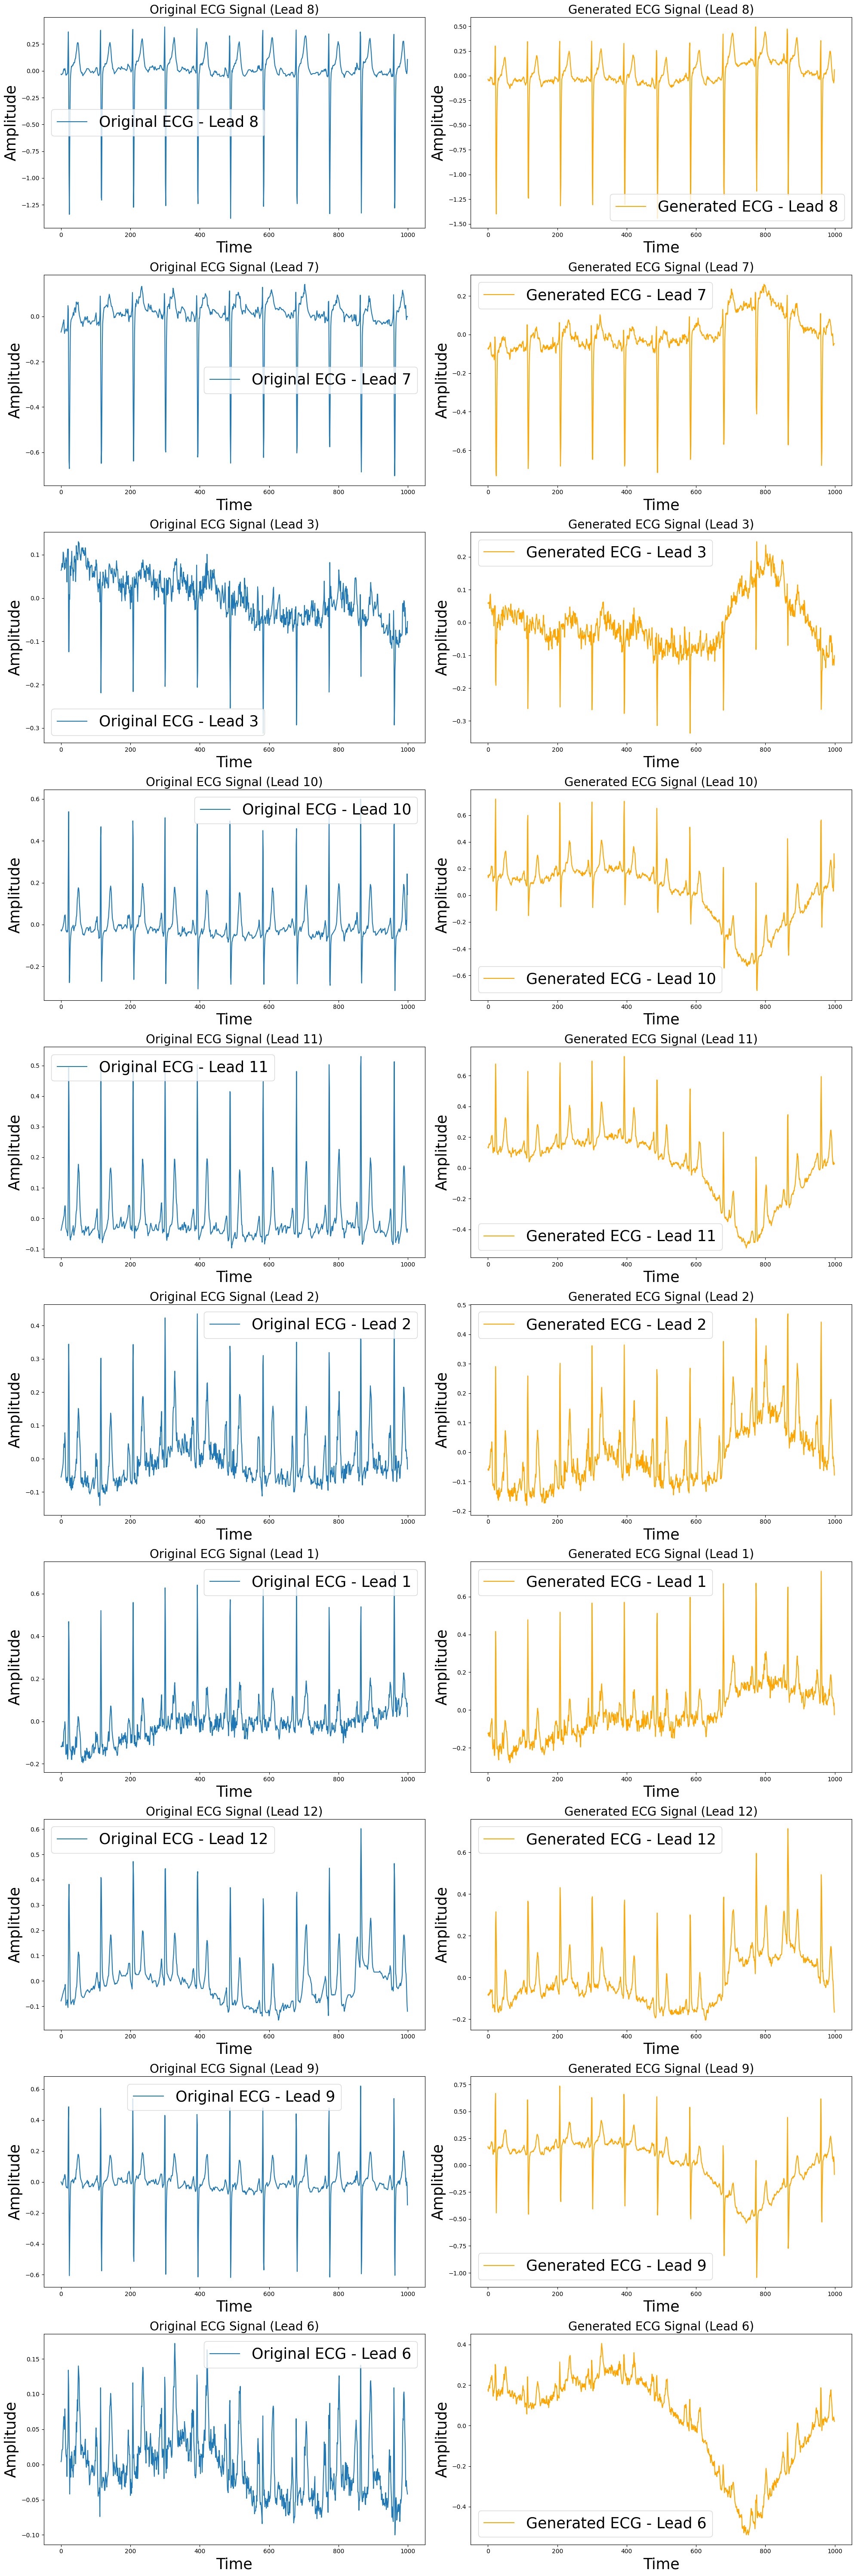

In [48]:
import numpy as np
import matplotlib.pyplot as plt

# Example ECG signal (1000, 12) - replace this with your actual ECG data
ecg_sample = X_train_filtered[0]

noise_em = downsampled_em
noise_bw = downsampled_bw
noise_ma = downsampled_ma

# Select a random starting index for 1000 consecutive samples from the noise arrays
start_index = np.random.randint(0, len(noise_em) - 1000)

# Extract 1000 consecutive samples from a random point in the noise arrays
noise_em_random = noise_em[start_index:start_index + 1000, :]
noise_bw_random = noise_bw[start_index:start_index + 1000, :]
noise_ma_random = noise_ma[start_index:start_index + 1000, :]

# Choose one of the random noise signals (e.g., EM, BW, MA)
noise_list = [noise_em_random, noise_bw_random, noise_ma_random]

# Choose one of the random noise signals (e.g., EM, BW, MA)
chosen_noise = noise_list[np.random.randint(0, len(noise_list))]

# Randomly select a subset of leads (at least 1 lead) to apply noise to
num_leads_to_add_noise = np.random.randint(1, 13)  # Choose 1 to 12 leads
selected_leads = np.random.choice(range(12), size=num_leads_to_add_noise, replace=False)

# Copy the ECG signal to avoid modifying the original
ecg_noisy = np.copy(ecg_sample)

# Add the noise to the selected leads
for lead in selected_leads:
    ecg_noisy[:, lead] += chosen_noise[:, np.random.choice([0, 1])]  # Apply noise from one of the 2 leads in the noise data

# Plot the original and noisy signals for each of the selected leads
plt.figure(figsize=(20, 6* num_leads_to_add_noise))

for i, lead in enumerate(selected_leads, 1):
    # Plot original signal
    plt.subplot(num_leads_to_add_noise, 2, 2 * i - 1)
    plt.plot(ecg_sample[:, lead], label=f'Original ECG - Lead {lead+1}')
    plt.title(f'Original ECG Signal (Lead {lead+1})', fontsize=20)
    plt.xlabel('Time', fontsize=25)
    plt.ylabel('Amplitude', fontsize=25)
    plt.legend(fontsize=25)

    # Plot noisy signal
    plt.subplot(num_leads_to_add_noise, 2, 2 * i)
    plt.plot(ecg_noisy[:, lead], label=f'Generated ECG - Lead {lead+1}', color='orange')
    plt.title(f'Generated ECG Signal (Lead {lead+1})', fontsize=20)
    plt.xlabel('Time', fontsize=25)
    plt.ylabel('Amplitude', fontsize=25)
    plt.legend(fontsize=25)

plt.tight_layout()
plt.show()

In [39]:
Train_data = {}
for i in range(len(X_train_filtered)):
    key = tuple(y_train_encoded_filtered[i].tolist())
    if key not in Train_data:
        Train_data[key] = []
    Train_data[key].append((X_train_filtered[i], i))  # Store tuple of (sample, index)

In [40]:
print(Train_data.keys())

dict_keys([(0, 0, 0, 1, 0), (0, 0, 1, 0, 0), (0, 0, 0, 0, 1), (0, 1, 0, 0, 0), (1, 0, 0, 0, 0), (0, 0, 1, 0, 1), (1, 1, 0, 0, 0), (1, 0, 1, 0, 0), (1, 0, 0, 0, 1), (0, 1, 1, 0, 0), (0, 1, 0, 0, 1), (0, 1, 1, 0, 1), (1, 0, 1, 0, 1), (1, 0, 0, 1, 0), (1, 1, 1, 0, 1), (1, 1, 0, 0, 1), (0, 0, 0, 1, 1), (1, 1, 1, 0, 0), (1, 0, 0, 1, 1), (0, 1, 0, 1, 0), (1, 1, 1, 1, 0)])


In [41]:
# Define backward DDPM and DDIM sampling
def calculate_tsnr1(signal, noise):
    """Calculate TSNR (Temporal Signal-to-Noise Ratio)."""
    signal_power = np.mean(signal ** 2)
    noise_power = np.mean(noise ** 2)
    return 10 * np.log10(signal_power / noise_power)
def ensure_tsnr1(signal, noise, target_snr=21):
    """Adjust noise to ensure that TSNR doesn't drop below the target."""
    current_snr = calculate_tsnr1(signal, noise)
    if current_snr < target_snr:
        adjustment_factor = 10 ** ((current_snr - target_snr) / 10)
        noise = noise * adjustment_factor
    return noise
# Define function to add noise according to the diffusion model
def give_noise(signal, num_leads=12):
    ecg_sample, index = signal  # Unpack sample and index

    noise_em = downsampled_em
    noise_bw = downsampled_bw
    noise_ma = downsampled_ma

    start_index = np.random.randint(0, len(noise_em) - 1000)
    noise_em_random = noise_em[start_index:start_index + 1000, :]
    noise_bw_random = noise_bw[start_index:start_index + 1000, :]
    noise_ma_random = noise_ma[start_index:start_index + 1000, :]

    noise_list = [noise_em_random, noise_bw_random, noise_ma_random]
    chosen_noise = noise_list[np.random.randint(0, len(noise_list))]

    num_leads_to_add_noise = np.random.randint(1, 13)
    selected_leads = np.random.choice(range(12), size=num_leads_to_add_noise, replace=False)

    ecg_noisy = np.copy(ecg_sample)

    for lead in selected_leads:
        ecg_noisy[:, lead] += chosen_noise[:, np.random.choice([0, 1])]

    return ecg_noisy, index  # Return both noisy sample and index

def generate_samples(signal, method='ddpm', num_samples=1, inference_timesteps=10):
    generated_samples = []
    for _ in range(num_samples):
        x, index = give_noise(signal)
        generated_samples.append((x, index))  # Store generated sample with index
    return generated_samples
MAX_Sample = 1000
cnt = 0
for y in Train_data.keys():
    cnt+=1
    if (cnt == 18):
        break
    print(f"{y} : Done")
    curr_len = len(Train_data[y])
    Gen_samples = MAX_Sample // curr_len
    if Gen_samples == 0:
        continue

    ecg_data = np.stack([x for x, _ in Train_data[y]])  # Extract only ECG samples
    print(f"Original data shape: {ecg_data.shape}")

    inference_timesteps = 25
    new_samples = []

    for sample, index in Train_data[y]:
        num_samples = Gen_samples
        generated_samples = generate_samples((sample, index), num_samples=num_samples, inference_timesteps=inference_timesteps)
        new_samples.extend(generated_samples)

    Train_data[y].extend(new_samples)
    print(f"Key {y} and Final Count: {len(Train_data[y])}")

(0, 0, 0, 1, 0) : Done
(0, 0, 1, 0, 0) : Done
(0, 0, 0, 0, 1) : Done
(0, 1, 0, 0, 0) : Done
Original data shape: (480, 1000, 12)
Key (0, 1, 0, 0, 0) and Final Count: 1440
(1, 0, 0, 0, 0) : Done
(0, 0, 1, 0, 1) : Done
Original data shape: (541, 1000, 12)
Key (0, 0, 1, 0, 1) and Final Count: 1082
(1, 1, 0, 0, 0) : Done
Original data shape: (273, 1000, 12)
Key (1, 1, 0, 0, 0) and Final Count: 1092
(1, 0, 1, 0, 0) : Done
(1, 0, 0, 0, 1) : Done
Original data shape: (434, 1000, 12)
Key (1, 0, 0, 0, 1) and Final Count: 1302
(0, 1, 1, 0, 0) : Done
Original data shape: (166, 1000, 12)
Key (0, 1, 1, 0, 0) and Final Count: 1162
(0, 1, 0, 0, 1) : Done
Original data shape: (710, 1000, 12)
Key (0, 1, 0, 0, 1) and Final Count: 1420
(0, 1, 1, 0, 1) : Done
Original data shape: (320, 1000, 12)
Key (0, 1, 1, 0, 1) and Final Count: 1280
(1, 0, 1, 0, 1) : Done
Original data shape: (202, 1000, 12)
Key (1, 0, 1, 0, 1) and Final Count: 1010
(1, 0, 0, 1, 0) : Done
Original data shape: (362, 1000, 12)
Key (1, 0

In [42]:
for i in Train_data.keys():
    print(f"Combination : {i} : {len(Train_data[i])}")

Combination : (0, 0, 0, 1, 0) : 8170
Combination : (0, 0, 1, 0, 0) : 2282
Combination : (0, 0, 0, 0, 1) : 2163
Combination : (0, 1, 0, 0, 0) : 1440
Combination : (1, 0, 0, 0, 0) : 1525
Combination : (0, 0, 1, 0, 1) : 1082
Combination : (1, 1, 0, 0, 0) : 1092
Combination : (1, 0, 1, 0, 0) : 1167
Combination : (1, 0, 0, 0, 1) : 1302
Combination : (0, 1, 1, 0, 0) : 1162
Combination : (0, 1, 0, 0, 1) : 1420
Combination : (0, 1, 1, 0, 1) : 1280
Combination : (1, 0, 1, 0, 1) : 1010
Combination : (1, 0, 0, 1, 0) : 1086
Combination : (1, 1, 1, 0, 1) : 1136
Combination : (1, 1, 0, 0, 1) : 1116
Combination : (0, 0, 0, 1, 1) : 1008
Combination : (1, 1, 1, 0, 0) : 112
Combination : (1, 0, 0, 1, 1) : 5
Combination : (0, 1, 0, 1, 0) : 2
Combination : (1, 1, 1, 1, 0) : 1


In [50]:
sum1 = 0
for i in Train_data.keys():
    sum1+=len(Train_data[i])

In [24]:
import numpy as np

# Initialize lists to store generated data
generated_samples_list = []
indices_list = []
labels_list = []

# Process Train_data and accumulate in lists
total_samples = 0  # Counter for total samples processed
for label, samples_with_indices in Train_data.items():
    for sample, index in samples_with_indices:
        generated_samples_list.append(sample)
        indices_list.append(index)
        labels_list.append(label)

        total_samples += 1  # Increment the counter
print(total_samples)


173726


In [27]:
import numpy as np

# Define batch size
batch_size = 1000

# Function to save data in batches from a list
def save_in_batches_from_list(data_list, filename_prefix, batch_size):
    batch = []
    batch_index = 0

    for i, sample in enumerate(data_list):
        batch.append(sample)
        
        # If batch is full or it's the last sample, save the batch
        if len(batch) >= batch_size or i == len(data_list) - 1:
            batch_array = np.array(batch)
            np.save(f'{filename_prefix}_batch_{batch_index}.npy', batch_array)
            batch_index += 1
            batch = []  # Reset batch

# Save generated samples list in batches
save_in_batches_from_list(generated_samples_list, 'generated_samples', batch_size)

print("All samples have been saved in batches.")
generated_samples_list1 = []


All samples have been saved in batches.


In [49]:
import numpy as np
from iterstrat.ml_stratifiers import MultilabelStratifiedKFold

# Your data
X_train = np.random.rand(19267, 1000, 12)  # Example data
Y_train = np.random.randint(0, 2, (19267, 5))  # Example multi-label data

# Define MultilabelStratifiedKFold
mskf = MultilabelStratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create the stratified folds
for train_index, val_index in mskf.split(X_train, Y_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    Y_train_fold, Y_val_fold = Y_train[train_index], Y_train[val_index]
    generated_samples_list.append(X_val_fold)
    generated_samples_list1.append(Y_val_fold)
save_in_batches_from_list(generated_samples_list, 'generated_samples', batch_size)
save_in_batches_from_list(generated_samples_list1, 'generated_samples', batch_size)
print("Validation Fold saved")

Validation Fold saved


In [28]:
import os
import numpy as np

# Function to load and concatenate batches
def load_and_concatenate_batches(batch_folder, filename_prefix):
    batch_files = [f for f in os.listdir(batch_folder) if f.startswith(filename_prefix)]
    
    # Initialize the final array to None
    training_array = None

    for batch_file in batch_files:
        batch_data = np.load(os.path.join(batch_folder, batch_file))
        
        if training_array is None:
            # If it's the first batch, initialize the array
            training_array = batch_data
        else:
            # Concatenate along the first axis (samples)
            training_array = np.concatenate((training_array, batch_data), axis=0)

    return training_array

# Load and concatenate all batches to create a training array
batch_folder = '.'  # Assuming the batches are saved in the current directory
training_array = load_and_concatenate_batches(batch_folder, 'generated_samples')

print(f"Training array shape: {training_array.shape}")



: 

In [26]:
# generated_samples_array = np.array(generated_samples_list)
# indices_array = np.array(indices_list)
# labels_array = np.array(labels_list)

# # Flatten the samples to a 2D array for saving to CSV
# num_samples = generated_samples_array.shape[0]
# flattened_samples_array = generated_samples_array.reshape(num_samples, -1)  # Flatten each (1000, 12) sample

# # Convert to DataFrame
# generated_samples_df = pd.DataFrame(flattened_samples_array)
# indices_df = pd.DataFrame(indices_array, columns=['Index'])
# labels_df = pd.DataFrame(labels_array, columns=['Label'])

# # Save to CSV
# generated_samples_df.to_csv('generated_samples.csv', index=False)
# indices_df.to_csv('indices.csv', index=False)
# labels_df.to_csv('labels.csv', index=False)

# print("CSV files have been saved.")